# 公開資訊觀測站:營益分析查詢彙總表
# https://mops.twse.com.tw/mops/web/t163sb06
## 選股條件
- 毛利率(%)大於30
- 營業利益率(%)大於30

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

year = 108
season = 2
url = "https://mops.twse.com.tw/mops/web/ajax_t163sb06"
payload = {
    'encodeURIComponent': '1',
    'step': '1',
    'firstin': '1',
    'off': '1',
    'isQuery':'Y',
    'TYPEK': 'sii',
    'year': year,
    'season': season
}

res = requests.get(url , params = payload)
soup = bs(res.text, "lxml")
tb = soup.select("table")[0]
df = pd.read_html(tb.prettify(), encoding = "utf8", header = 0)
name = ['公司代號','公司名稱','營業收入','毛利率(%)','營業利益率(%)','稅前純益率(%)','稅後純益率(%)']
df[0].columns= name
df[0].head()

,公司代號,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%)
0,1101,台泥,56723.49,27.87,22.53,26.34,20.91
1,1102,亞泥,43805.59,29.07,24.81,33.48,26.10
2,1103,嘉泥,890.41,13.32,-12.88,34.25,88.54
3,1104,環泥,2381.47,9.70,1.23,20.04,19.29
4,1108,幸福,1735.45,5.58,-0.68,-1.36,-0.90


In [2]:
df1 = df[0][df[0]['公司代號']!='公司代號']
df1.head()

,公司代號,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%)
0,1101,台泥,56723.49,27.87,22.53,26.34,20.91
1,1102,亞泥,43805.59,29.07,24.81,33.48,26.10
2,1103,嘉泥,890.41,13.32,-12.88,34.25,88.54
3,1104,環泥,2381.47,9.70,1.23,20.04,19.29
4,1108,幸福,1735.45,5.58,-0.68,-1.36,-0.90


In [3]:
df[0]['年度季別'] ='{:03d}{:02d}'.format(year, season)
df[0]

,公司代號,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%),年度季別
0,1101,台泥,56723.49,27.87,22.53,26.34,20.91,10802
1,1102,亞泥,43805.59,29.07,24.81,33.48,26.10,10802
2,1103,嘉泥,890.41,13.32,-12.88,34.25,88.54,10802
3,1104,環泥,2381.47,9.70,1.23,20.04,19.29,10802
4,1108,幸福,1735.45,5.58,-0.68,-1.36,-0.90,10802
...,...,...,...,...,...,...,...,...
964,9944,新麗,1608.10,25.07,4.54,4.09,2.66,10802
965,9945,潤泰新,7945.48,21.99,11.68,79.74,77.43,10802
966,9946,三發地產,2827.39,41.16,32.94,32.56,32.46,10802
967,9955,佳龍,833.51,3.92,-2.25,3.26,3.26,10802


# SQLite儲存
# 查看SQLite工具 [DB Browser for SQLite](https://sqlitebrowser.org/)

In [4]:
import sqlite3
conn = sqlite3.connect("test.sqlite3")
df1.to_sql('fin', conn, if_exists='replace')
df = pd.read_sql("select * from fin", conn, index_col=['公司代號'])
df.head()

,index,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%)
公司代號,,,,,,,
1101,0,台泥,56723.49,27.87,22.53,26.34,20.91
1102,1,亞泥,43805.59,29.07,24.81,33.48,26.10
1103,2,嘉泥,890.41,13.32,-12.88,34.25,88.54
1104,3,環泥,2381.47,9.70,1.23,20.04,19.29
1108,4,幸福,1735.45,5.58,-0.68,-1.36,-0.90


In [5]:
df1.dtypes

公司代號        object
公司名稱        object
營業收入        object
毛利率(%)      object
營業利益率(%)    object
稅前純益率(%)    object
稅後純益率(%)    object
dtype: object

In [6]:
df1 = df1.apply(pd.to_numeric, errors='ignore')

In [8]:
df1[(df1['毛利率(%)'] > 30) & (df1['營業利益率(%)'] > 30)]

,公司代號,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%)
68,1437,勤益控,322.69,73.25,52.14,64.28,237.67
242,2059,川湖,2253.12,52.21,39.04,47.97,35.38
263,2231,為升,2064.13,53.87,34.31,35.33,28.45
285,2330,台積電,459702.94,42.22,30.58,32.35,27.88
410,2492,華新科,16172.75,39.94,30.86,33.72,24.97
428,2524,京城,2423.81,51.24,39.62,36.48,33.13
466,2633,台灣高鐵,23628.72,46.75,44.27,17.67,17.93
471,2701,萬企,174.73,59.57,51.48,138.10,106.84
475,2706,第一店,171.79,75.61,67.00,195.74,154.78
496,2904,匯僑,256.60,49.46,36.67,35.43,28.21


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27611 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29575 missing from curre

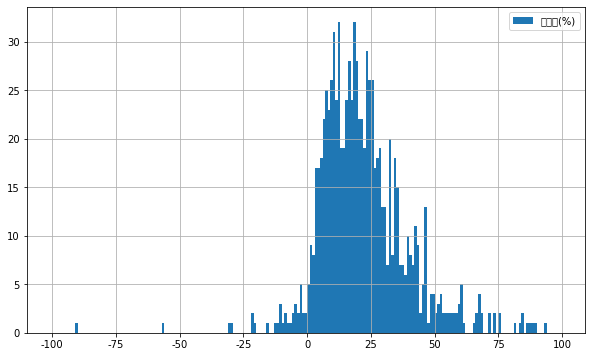

In [9]:
%pylab inline
plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(figsize=(10, 6))
df1['毛利率(%)'].hist(bins=range(-100,100), label="毛利率(%)")
plt.legend()

# 將上面程式碼合併

In [10]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

year = 108
season = 2
url = "https://mops.twse.com.tw/mops/web/ajax_t163sb06"
payload = {
    'encodeURIComponent': '1',
    'step': '1',
    'firstin': '1',
    'off': '1',
    'isQuery':'Y',
    'TYPEK': 'sii',
    'year': year,
    'season': season
}

df0 = []
name = ['公司代號','公司名稱','營業收入','毛利率(%)','營業利益率(%)','稅前純益率(%)','稅後純益率(%)']
for i in range(1, 3):
    payload['season'] = i
    res = requests.get(url , params = payload)
    soup = bs(res.text, "lxml")
    tb = soup.select("table")[0]
    df = pd.read_html(tb.prettify(), encoding = "utf8", header = 0)  
    df[0].columns = name
    df = df[0][df[0]['公司代號']!='公司代號']
    df['年度季別'] ='{:03d}{:02d}'.format(year, i)
    df0.append(df)
df = pd.concat(df0)
df1 = df.apply(pd.to_numeric, errors='ignore')
#df1 = df1.set_index('公司代號')
df1  

,公司代號,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%),年度季別
0,1101,台泥,25356.33,25.59,19.85,22.10,16.68,10801
1,1102,亞泥,19385.68,24.03,19.49,24.47,19.65,10801
2,1103,嘉泥,452.38,14.42,-12.37,37.91,32.84,10801
3,1104,環泥,1187.30,8.96,0.85,13.25,13.19,10801
4,1108,幸福,834.35,3.20,-3.16,-4.20,-3.57,10801
...,...,...,...,...,...,...,...,...
964,9944,新麗,1608.10,25.07,4.54,4.09,2.66,10802
965,9945,潤泰新,7945.48,21.99,11.68,79.74,77.43,10802
966,9946,三發地產,2827.39,41.16,32.94,32.56,32.46,10802
967,9955,佳龍,833.51,3.92,-2.25,3.26,3.26,10802


In [11]:
df2 = df1[(df1['毛利率(%)'] > 30) & (df1['營業利益率(%)'] > 30) & (df1['年度季別'] == 10801)]
df2

,公司代號,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%),年度季別
68,1437,勤益控,194.77,76.69,64.55,79.60,67.16,10801
242,2059,川湖,1149.46,52.50,39.39,46.05,38.68,10801
263,2231,為升,1005.65,55.33,36.04,35.89,28.69,10801
296,2348,海悅,195.42,63.72,33.90,32.95,25.91,10801
410,2492,華新科,8294.21,42.70,32.99,36.63,29.59,10801
422,2509,全坤建,791.46,42.95,31.49,34.10,33.43,10801
428,2524,京城,1077.71,59.83,50.99,47.82,43.79,10801
466,2633,台灣高鐵,11762.19,47.05,44.69,18.47,19.45,10801
471,2701,萬企,84.49,63.26,55.10,114.39,91.49,10801
475,2706,第一店,85.08,76.42,67.90,158.97,129.26,10801


In [12]:
df3 = df1[(df1['毛利率(%)'] > 30) & (df1['營業利益率(%)'] > 30) & (df1['年度季別'] == 10802)]
df3

,公司代號,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%),年度季別
68,1437,勤益控,322.69,73.25,52.14,64.28,237.67,10802
242,2059,川湖,2253.12,52.21,39.04,47.97,35.38,10802
263,2231,為升,2064.13,53.87,34.31,35.33,28.45,10802
285,2330,台積電,459702.94,42.22,30.58,32.35,27.88,10802
410,2492,華新科,16172.75,39.94,30.86,33.72,24.97,10802
428,2524,京城,2423.81,51.24,39.62,36.48,33.13,10802
466,2633,台灣高鐵,23628.72,46.75,44.27,17.67,17.93,10802
471,2701,萬企,174.73,59.57,51.48,138.10,106.84,10802
475,2706,第一店,171.79,75.61,67.00,195.74,154.78,10802
496,2904,匯僑,256.60,49.46,36.67,35.43,28.21,10802


In [13]:
df4 = pd.merge(df2, df3, on=['公司代號', '公司名稱'], how='inner')
df4

,公司代號,公司名稱,營業收入_x,毛利率(%)_x,營業利益率(%)_x,稅前純益率(%)_x,稅後純益率(%)_x,年度季別_x,營業收入_y,毛利率(%)_y,營業利益率(%)_y,稅前純益率(%)_y,稅後純益率(%)_y,年度季別_y
0,1437,勤益控,194.77,76.69,64.55,79.60,67.16,10801,322.69,73.25,52.14,64.28,237.67,10802
1,2059,川湖,1149.46,52.50,39.39,46.05,38.68,10801,2253.12,52.21,39.04,47.97,35.38,10802
2,2231,為升,1005.65,55.33,36.04,35.89,28.69,10801,2064.13,53.87,34.31,35.33,28.45,10802
3,2492,華新科,8294.21,42.70,32.99,36.63,29.59,10801,16172.75,39.94,30.86,33.72,24.97,10802
4,2524,京城,1077.71,59.83,50.99,47.82,43.79,10801,2423.81,51.24,39.62,36.48,33.13,10802
5,2633,台灣高鐵,11762.19,47.05,44.69,18.47,19.45,10801,23628.72,46.75,44.27,17.67,17.93,10802
6,2701,萬企,84.49,63.26,55.10,114.39,91.49,10801,174.73,59.57,51.48,138.10,106.84,10802
7,2706,第一店,85.08,76.42,67.90,158.97,129.26,10801,171.79,75.61,67.00,195.74,154.78,10802
8,2904,匯僑,127.49,45.61,34.50,32.19,25.31,10801,256.60,49.46,36.67,35.43,28.21,10802
9,3008,大立光,9823.51,64.24,53.28,62.29,51.45,10801,23904.24,67.40,57.53,62.95,48.55,10802


In [15]:
import sqlite3
conn = sqlite3.connect("test.sqlite3")
df4.to_sql('fin', conn, if_exists='replace')
df = pd.read_sql("select * from fin", conn, index_col=['公司代號'])
df.head()

,index,公司名稱,營業收入_x,毛利率(%)_x,營業利益率(%)_x,稅前純益率(%)_x,稅後純益率(%)_x,年度季別_x,營業收入_y,毛利率(%)_y,營業利益率(%)_y,稅前純益率(%)_y,稅後純益率(%)_y,年度季別_y
公司代號,,,,,,,,,,,,,,
1437,0,勤益控,194.77,76.69,64.55,79.60,67.16,10801,322.69,73.25,52.14,64.28,237.67,10802
2059,1,川湖,1149.46,52.50,39.39,46.05,38.68,10801,2253.12,52.21,39.04,47.97,35.38,10802
2231,2,為升,1005.65,55.33,36.04,35.89,28.69,10801,2064.13,53.87,34.31,35.33,28.45,10802
2492,3,華新科,8294.21,42.70,32.99,36.63,29.59,10801,16172.75,39.94,30.86,33.72,24.97,10802
2524,4,京城,1077.71,59.83,50.99,47.82,43.79,10801,2423.81,51.24,39.62,36.48,33.13,10802


# 個股日本益比
# https://www.twse.com.tw/zh/page/trading/exchange/BWIBBU_d.html

In [18]:
import requests
import pandas as pd

url = "https://www.twse.com.tw/exchangeReport/BWIBBU_d?response=json"
res = requests.get(url).json()
res

{'data': [['1101', '台泥', '9.34', 107, '10.58', '1.32', '108/3'],
  ['1102', '亞泥', '5.86', 107, '10.53', '1.12', '108/3'],
  ['1103', '嘉泥', '5.00', 107, '9.90', '0.59', '108/3'],
  ['1104', '環泥', '5.17', 107, '12.65', '0.71', '108/3'],
  ['1108', '幸福', '0.00', 107, '-', '0.75', '108/3'],
  ['1109', '信大', '4.22', 107, '6.63', '0.99', '108/3'],
  ['1110', '東泥', '0.58', 107, '857.50', '1.15', '108/3'],
  ['1201', '味全', '3.25', 107, '9.92', '1.78', '108/3'],
  ['1203', '味王', '3.70', 107, '14.67', '1.30', '108/3'],
  ['1210', '大成', '4.47', 107, '15.41', '1.96', '108/3'],
  ['1213', '大飲', '0.00', 106, '-', '0.60', '108/3'],
  ['1215', '卜蜂', '4.50', 107, '14.23', '2.44', '108/3'],
  ['1216', '統一', '3.37', 107, '22.39', '3.94', '108/3'],
  ['1217', '愛之味', '0.00', 107, '44.75', '0.63', '108/3'],
  ['1218', '泰山', '3.60', 107, '19.82', '1.66', '108/3'],
  ['1219', '福壽', '0.54', 107, '68.33', '1.56', '108/3'],
  ['1220', '台榮', '4.34', 107, '18.93', '0.84', '108/3'],
  ['1225', '福懋油', '3.24', 107, '

In [19]:
jd = pd.DataFrame(res['data'], columns = res['fields'])
jd = jd.apply(pd.to_numeric, errors='ignore')
jd

,證券代號,證券名稱,殖利率(%),股利年度,本益比,股價淨值比,財報年/季
0,1101,台泥,9.34,107,10.58,1.32,108/3
1,1102,亞泥,5.86,107,10.53,1.12,108/3
2,1103,嘉泥,5.00,107,9.90,0.59,108/3
3,1104,環泥,5.17,107,12.65,0.71,108/3
4,1108,幸福,0.00,107,-,0.75,108/3
...,...,...,...,...,...,...,...
936,9944,新麗,0.00,107,-,0.65,108/3
937,9945,潤泰新,4.56,107,4.05,0.53,108/3
938,9946,三發地產,3.73,107,5.45,1.26,108/3
939,9955,佳龍,0.00,107,112.81,1.07,108/3


In [20]:
jd['股價淨值比'].max()

15.57

In [21]:
df = jd[(jd['股價淨值比']>2) & (jd['股價淨值比']<5)]
df.head()

,證券代號,證券名稱,殖利率(%),股利年度,本益比,股價淨值比,財報年/季
11,1215,卜蜂,4.50,107,14.23,2.44,108/3
12,1216,統一,3.37,107,22.39,3.94,108/3
17,1225,福懋油,3.24,107,23.83,2.47,108/3
18,1227,佳格,3.52,107,20.06,4.06,108/3
20,1231,聯華食,5.51,107,15.13,2.13,108/3


# 合併程式碼

In [22]:
import requests
import pandas as pd
import datetime as dt

url = "https://www.twse.com.tw/exchangeReport/BWIBBU_d?response=json"
res = requests.get(url).json()
jd = pd.DataFrame(res['data'], columns = res['fields'])
jd = jd.apply(pd.to_numeric, errors='ignore')
#d = jd.set_index('證券代號')
jd

,證券代號,證券名稱,殖利率(%),股利年度,本益比,股價淨值比,財報年/季
0,1101,台泥,9.34,107,10.58,1.32,108/3
1,1102,亞泥,5.86,107,10.53,1.12,108/3
2,1103,嘉泥,5.00,107,9.90,0.59,108/3
3,1104,環泥,5.17,107,12.65,0.71,108/3
4,1108,幸福,0.00,107,-,0.75,108/3
...,...,...,...,...,...,...,...
936,9944,新麗,0.00,107,-,0.65,108/3
937,9945,潤泰新,4.56,107,4.05,0.53,108/3
938,9946,三發地產,3.73,107,5.45,1.26,108/3
939,9955,佳龍,0.00,107,112.81,1.07,108/3


In [23]:
jd[ '本益比']

0       10.58
1       10.53
2        9.90
3       12.65
4           -
        ...  
936         -
937      4.05
938      5.45
939    112.81
940     25.33
Name: 本益比, Length: 941, dtype: object

# 證交所
# [三大法人每日買賣統計金額表](https://www.twse.com.tw/zh/page/trading/fund/BFI82U.html)

In [23]:
import pandas as pd
import requests
import datetime as dt
import time

datecount = 10
count = 10

df2 = []
name = ['自營商(自行買賣)買進金額', '自營商(自行買賣)賣出金額', '自營商(避險)買進金額', '自營商(避險)賣出金額', '投信買進金額', '投信賣出金額', '外資及陸資買進金額', '外資及陸資賣出金額',]
for i in range(datecount):
    base= dt.datetime.now() - dt.timedelta(days = i)
    date = dt.datetime.strftime(base, "%Y%m%d")    
    url = "http://www.twse.com.tw/fund/BFI82U?response=json&dayDate={}".format(date)
    time.sleep(6)
    res = requests.get(url).json()
    print("-" * count, "第" , i + 1, "次連線", date, "-" * count)
    if res["stat"] == "OK" :
        df0 = pd.DataFrame(res['data'])
        df0 = df0.iloc[0:4, 1:3]
        df1 = df0.iloc[0].values.tolist() + df0.iloc[1].values.tolist() + df0.iloc[2].values.tolist() + df0.iloc[3].values.tolist()
        df2.append(pd.DataFrame(df1, index = name, columns = [date]).T)

print("完成抓取!!")
df = pd.concat(df2)
df.index.name = '日期'
df

---------- 第 1 次連線 20191026 ----------
---------- 第 2 次連線 20191025 ----------
---------- 第 3 次連線 20191024 ----------
---------- 第 4 次連線 20191023 ----------
---------- 第 5 次連線 20191022 ----------
---------- 第 6 次連線 20191021 ----------
---------- 第 7 次連線 20191020 ----------
---------- 第 8 次連線 20191019 ----------
---------- 第 9 次連線 20191018 ----------
---------- 第 10 次連線 20191017 ----------
完成抓取!!


,自營商(自行買賣)買進金額,自營商(自行買賣)賣出金額,自營商(避險)買進金額,自營商(避險)賣出金額,投信買進金額,投信賣出金額,外資及陸資買進金額,外資及陸資賣出金額
日期,,,,,,,,
20191025,"1,151,977,060","1,343,494,800","5,989,956,941","5,534,201,809","1,282,845,729","1,378,233,290","33,075,958,466","29,779,560,204"
20191024,"1,570,042,110","2,021,686,047","7,190,522,325","5,340,734,833","1,728,343,390","1,546,348,831","45,275,357,509","30,499,554,116"
20191023,"1,580,961,940","3,868,598,029","6,642,501,148","6,317,397,616","1,374,989,700","1,080,676,127","36,656,907,015","31,705,740,279"
20191022,"1,381,872,590","1,317,163,470","3,539,226,417","3,958,820,544","1,468,057,556","1,889,365,891","40,200,493,910","26,379,276,498"
20191021,"1,183,292,560","978,826,640","3,745,169,632","3,627,567,509","932,261,438","892,407,831","29,283,995,306","24,557,341,049"
20191018,"1,367,583,500","1,533,060,020","4,890,534,544","4,583,506,891","1,425,516,424","1,307,558,974","58,114,496,794","51,994,725,595"
20191017,"1,494,538,190","1,094,014,668","3,934,081,708","3,665,969,240","1,284,819,925","1,132,998,262","41,151,285,947","31,935,219,315"


In [24]:
import pandas as pd
import requests
import time
from dateutil.relativedelta import relativedelta
import datetime as dt

count = 10
name = ['自營商(自行買賣)買進金額', '自營商(自行買賣)賣出金額', '自營商(避險)買進金額', '自營商(避險)賣出金額', '投信買進金額', '投信賣出金額', '外資及陸資買進金額', '外資及陸資賣出金額',]
df2 = [] 
base = dt.datetime.now() - relativedelta(days = 10)
while(base < dt.datetime.now()):
    date = dt.datetime.strftime(base, "%Y%m%d")   
    url = "http://www.twse.com.tw/fund/BFI82U?response=json&dayDate={}".format(date)
    print("-" * count, date, "連線", "-" * count)
    time.sleep(6)
    res = requests.get(url).json()    
    if res["stat"] == "OK" :
        df0 = pd.DataFrame(res['data'])
        df0 = df0.iloc[0:4, 1:3]
        df1 = df0.iloc[0].values.tolist() + df0.iloc[1].values.tolist() + df0.iloc[2].values.tolist() + df0.iloc[3].values.tolist()
        df2.append(pd.DataFrame(df1, index = name, columns = [date]).T)
    base += relativedelta(days = 1)

print("完成抓取!!")    
df = pd.concat(df2)
df.index.name = '日期'
df

---------- 20191016 連線 ----------
---------- 20191017 連線 ----------
---------- 20191018 連線 ----------
---------- 20191019 連線 ----------
---------- 20191020 連線 ----------
---------- 20191021 連線 ----------
---------- 20191022 連線 ----------
---------- 20191023 連線 ----------
---------- 20191024 連線 ----------
---------- 20191025 連線 ----------
---------- 20191026 連線 ----------
完成抓取!!


,自營商(自行買賣)買進金額,自營商(自行買賣)賣出金額,自營商(避險)買進金額,自營商(避險)賣出金額,投信買進金額,投信賣出金額,外資及陸資買進金額,外資及陸資賣出金額
日期,,,,,,,,
20191016,"1,510,734,380","4,046,259,003","5,057,260,415","5,873,445,914","1,496,910,250","1,383,198,685","47,152,900,824","37,895,088,320"
20191017,"1,494,538,190","1,094,014,668","3,934,081,708","3,665,969,240","1,284,819,925","1,132,998,262","41,151,285,947","31,935,219,315"
20191018,"1,367,583,500","1,533,060,020","4,890,534,544","4,583,506,891","1,425,516,424","1,307,558,974","58,114,496,794","51,994,725,595"
20191021,"1,183,292,560","978,826,640","3,745,169,632","3,627,567,509","932,261,438","892,407,831","29,283,995,306","24,557,341,049"
20191022,"1,381,872,590","1,317,163,470","3,539,226,417","3,958,820,544","1,468,057,556","1,889,365,891","40,200,493,910","26,379,276,498"
20191023,"1,580,961,940","3,868,598,029","6,642,501,148","6,317,397,616","1,374,989,700","1,080,676,127","36,656,907,015","31,705,740,279"
20191024,"1,570,042,110","2,021,686,047","7,190,522,325","5,340,734,833","1,728,343,390","1,546,348,831","45,275,357,509","30,499,554,116"
20191025,"1,151,977,060","1,343,494,800","5,989,956,941","5,534,201,809","1,282,845,729","1,378,233,290","33,075,958,466","29,779,560,204"


In [25]:
import pandas as pd
import requests
import time
from dateutil.relativedelta import relativedelta
import datetime as dt

class TradingData:   
    def __init__(self, years = 0, months = 0, days = 0, delay = 5):
        self.df2 = []
        self.name = ['自營商(自行買賣)買進金額', '自營商(自行買賣)賣出金額', '自營商(避險)買進金額', '自營商(避險)賣出金額', '投信買進金額', '投信賣出金額', '外資及陸資買進金額', '外資及陸資賣出金額',]
        self.years  = years
        self.months = months
        self.days   = days
        self.delay  = delay
        self.count  = 10
        
    def getData(self):
        base = dt.datetime.now() - relativedelta(years = self.years, months = self.months, days = self.days)
        while(base < dt.datetime.now()):
            date = dt.datetime.strftime(base, "%Y%m%d")   
            url = "http://www.twse.com.tw/fund/BFI82U?response=json&dayDate={}".format(date)
            print("-" * self.count, date, "連線", "-" * self.count)
            time.sleep(self.delay)
            res = requests.get(url).json()    
            if res["stat"] == "OK" :
                df0 = pd.DataFrame(res['data'])
                df0 = df0.iloc[0:4, 1:3]
                df1 = df0.iloc[0].values.tolist() + df0.iloc[1].values.tolist() + df0.iloc[2].values.tolist() + df0.iloc[3].values.tolist()
                self.df2.append(pd.DataFrame(df1, index = self.name, columns = [date]).T)
            base += relativedelta(days = 1)
        return pd.concat(self.df2)

td = TradingData(days = 10)
df = td.getData()
df.index.name = '日期'
df

---------- 20191016 連線 ----------
---------- 20191017 連線 ----------
---------- 20191018 連線 ----------
---------- 20191019 連線 ----------
---------- 20191020 連線 ----------
---------- 20191021 連線 ----------
---------- 20191022 連線 ----------
---------- 20191023 連線 ----------
---------- 20191024 連線 ----------
---------- 20191025 連線 ----------
---------- 20191026 連線 ----------


,自營商(自行買賣)買進金額,自營商(自行買賣)賣出金額,自營商(避險)買進金額,自營商(避險)賣出金額,投信買進金額,投信賣出金額,外資及陸資買進金額,外資及陸資賣出金額
日期,,,,,,,,
20191016,"1,510,734,380","4,046,259,003","5,057,260,415","5,873,445,914","1,496,910,250","1,383,198,685","47,152,900,824","37,895,088,320"
20191017,"1,494,538,190","1,094,014,668","3,934,081,708","3,665,969,240","1,284,819,925","1,132,998,262","41,151,285,947","31,935,219,315"
20191018,"1,367,583,500","1,533,060,020","4,890,534,544","4,583,506,891","1,425,516,424","1,307,558,974","58,114,496,794","51,994,725,595"
20191021,"1,183,292,560","978,826,640","3,745,169,632","3,627,567,509","932,261,438","892,407,831","29,283,995,306","24,557,341,049"
20191022,"1,381,872,590","1,317,163,470","3,539,226,417","3,958,820,544","1,468,057,556","1,889,365,891","40,200,493,910","26,379,276,498"
20191023,"1,580,961,940","3,868,598,029","6,642,501,148","6,317,397,616","1,374,989,700","1,080,676,127","36,656,907,015","31,705,740,279"
20191024,"1,570,042,110","2,021,686,047","7,190,522,325","5,340,734,833","1,728,343,390","1,546,348,831","45,275,357,509","30,499,554,116"
20191025,"1,151,977,060","1,343,494,800","5,989,956,941","5,534,201,809","1,282,845,729","1,378,233,290","33,075,958,466","29,779,560,204"


In [26]:
import sqlite3
conn = sqlite3.connect("everydaydata.sqlite3")
df.to_sql('stat', conn, if_exists='replace')

In [27]:
df = pd.read_sql("select * from stat", conn, index_col=['日期'])
df.head()

,自營商(自行買賣)買進金額,自營商(自行買賣)賣出金額,自營商(避險)買進金額,自營商(避險)賣出金額,投信買進金額,投信賣出金額,外資及陸資買進金額,外資及陸資賣出金額
日期,,,,,,,,
20191016,"1,510,734,380","4,046,259,003","5,057,260,415","5,873,445,914","1,496,910,250","1,383,198,685","47,152,900,824","37,895,088,320"
20191017,"1,494,538,190","1,094,014,668","3,934,081,708","3,665,969,240","1,284,819,925","1,132,998,262","41,151,285,947","31,935,219,315"
20191018,"1,367,583,500","1,533,060,020","4,890,534,544","4,583,506,891","1,425,516,424","1,307,558,974","58,114,496,794","51,994,725,595"
20191021,"1,183,292,560","978,826,640","3,745,169,632","3,627,567,509","932,261,438","892,407,831","29,283,995,306","24,557,341,049"
20191022,"1,381,872,590","1,317,163,470","3,539,226,417","3,958,820,544","1,468,057,556","1,889,365,891","40,200,493,910","26,379,276,498"


# 證交所 股價價格
# [價格指數](https://www.twse.com.tw/zh/page/trading/exchange/MI_INDEX.html)


In [109]:
import pandas as pd
import requests
from io import StringIO

url = "https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=20191025&type=ALLBUT0999"
res = requests.get(url)
res.text

'"108年10月25日 價格指數(臺灣證券交易所)"\r\n"指數","收盤指數","漲跌(+/-)","漲跌點數","漲跌百分比(%)",\r\n"寶島股價指數","12,915.96","-","27.43","-0.21",\r\n"發行量加權股價指數","11,296.12","-","24.02","-0.21",\r\n"臺灣公司治理100指數","6,416.78","-","5.26","-0.08",\r\n"臺灣50指數","8,623.28","-","12.61","-0.15",\r\n"臺灣中型100指數","8,381.47","-","30.23","-0.36",\r\n"臺灣資訊科技指數","12,024.12","-","3.14","-0.03",\r\n"臺灣發達指數","8,348.21","-","31.70","-0.38",\r\n"臺灣高股息指數","6,437.83","-","22.74","-0.35",\r\n"臺灣就業99指數","6,589.74","-","13.76","-0.21",\r\n"臺灣高薪100指數","6,159.98","-","17.62","-0.29",\r\n"未含金融指數","9,537.67","-","22.84","-0.24",\r\n"未含電子指數","14,818.72","-","39.07","-0.26",\r\n"未含金融電子指數","12,317.04","-","44.83","-0.36",\r\n"小型股300指數","6,669.69","-","25.94","-0.39",\r\n"水泥窯製類指數","581.39","-","2.47","-0.42",\r\n"塑膠化工類指數","845.98","-","4.99","-0.59",\r\n"機電類指數","2,705.39","-","4.11","-0.15",\r\n"水泥類指數","160.79","-","0.70","-0.43",\r\n"食品類指數","1,762.11","-","0.68","-0.04",\r\n"塑膠類指數","257.84","-","1.51","-0.58",\r\n"紡織纖維類指數","538.52","-","1.37","-0.2

In [68]:
print(res.text)

"108年10月25日 價格指數(臺灣證券交易所)"
"指數","收盤指數","漲跌(+/-)","漲跌點數","漲跌百分比(%)",
"寶島股價指數","12,915.96","-","27.43","-0.21",
"發行量加權股價指數","11,296.12","-","24.02","-0.21",
"臺灣公司治理100指數","6,416.78","-","5.26","-0.08",
"臺灣50指數","8,623.28","-","12.61","-0.15",
"臺灣中型100指數","8,381.47","-","30.23","-0.36",
"臺灣資訊科技指數","12,024.12","-","3.14","-0.03",
"臺灣發達指數","8,348.21","-","31.70","-0.38",
"臺灣高股息指數","6,437.83","-","22.74","-0.35",
"臺灣就業99指數","6,589.74","-","13.76","-0.21",
"臺灣高薪100指數","6,159.98","-","17.62","-0.29",
"未含金融指數","9,537.67","-","22.84","-0.24",
"未含電子指數","14,818.72","-","39.07","-0.26",
"未含金融電子指數","12,317.04","-","44.83","-0.36",
"小型股300指數","6,669.69","-","25.94","-0.39",
"水泥窯製類指數","581.39","-","2.47","-0.42",
"塑膠化工類指數","845.98","-","4.99","-0.59",
"機電類指數","2,705.39","-","4.11","-0.15",
"水泥類指數","160.79","-","0.70","-0.43",
"食品類指數","1,762.11","-","0.68","-0.04",
"塑膠類指數","257.84","-","1.51","-0.58",
"紡織纖維類指數","538.52","-","1.37","-0.25",
"電機機械類指數","173.28","+","0.95","0.55",
"電器電纜類指數","47.83","+","0.

In [80]:
res.text.split('\r\n')

['"108年10月25日 價格指數(臺灣證券交易所)"',
 '"指數","收盤指數","漲跌(+/-)","漲跌點數","漲跌百分比(%)",',
 '"寶島股價指數","12,915.96","-","27.43","-0.21",',
 '"發行量加權股價指數","11,296.12","-","24.02","-0.21",',
 '"臺灣公司治理100指數","6,416.78","-","5.26","-0.08",',
 '"臺灣50指數","8,623.28","-","12.61","-0.15",',
 '"臺灣中型100指數","8,381.47","-","30.23","-0.36",',
 '"臺灣資訊科技指數","12,024.12","-","3.14","-0.03",',
 '"臺灣發達指數","8,348.21","-","31.70","-0.38",',
 '"臺灣高股息指數","6,437.83","-","22.74","-0.35",',
 '"臺灣就業99指數","6,589.74","-","13.76","-0.21",',
 '"臺灣高薪100指數","6,159.98","-","17.62","-0.29",',
 '"未含金融指數","9,537.67","-","22.84","-0.24",',
 '"未含電子指數","14,818.72","-","39.07","-0.26",',
 '"未含金融電子指數","12,317.04","-","44.83","-0.36",',
 '"小型股300指數","6,669.69","-","25.94","-0.39",',
 '"水泥窯製類指數","581.39","-","2.47","-0.42",',
 '"塑膠化工類指數","845.98","-","4.99","-0.59",',
 '"機電類指數","2,705.39","-","4.11","-0.15",',
 '"水泥類指數","160.79","-","0.70","-0.43",',
 '"食品類指數","1,762.11","-","0.68","-0.04",',
 '"塑膠類指數","257.84","-","1.51","-0.58",',
 '"紡織纖維類指數","5

In [95]:
l = []
for line in res.text.split('\r\n'):
    if len(line.split('",')) == 17 and line[0] != "=" :
        l.append(line)
l2 = "\n".join(l)
l2

'"證券代號","證券名稱","成交股數","成交筆數","成交金額","開盤價","最高價","最低價","收盤價","漲跌(+/-)","漲跌價差","最後揭示買價","最後揭示買量","最後揭示賣價","最後揭示賣量","本益比",\n"1101","台泥","21,160,672","7,604","863,421,380","41.20","41.25","40.60","40.85","-","0.15","40.85","9","40.90","1,359","9.68",\n"1101B","台泥乙特","1,150","5","61,953","53.90","53.90","53.90","53.90"," ","0.00","53.60","37","53.70","1","0.00",\n"1102","亞泥","6,114,581","2,496","267,156,364","43.90","43.95","43.45","43.70","-","0.25","43.60","3","43.70","43","10.48",\n"1103","嘉泥","1,206,645","502","22,661,788","18.95","19.00","18.70","18.75","-","0.15","18.75","7","18.80","41","11.72",\n"1104","環泥","330,574","191","6,255,045","19.00","19.00","18.85","18.95","-","0.05","18.90","6","19.00","31","11.21",\n"1108","幸福","338,900","94","2,712,897","8.01","8.04","7.94","8.01","+","0.01","8.01","13","8.03","1","0.00",\n"1109","信大","158,638","82","2,953,352","18.80","18.80","18.50","18.60","-","0.10","18.55","19","18.60","10","6.71",\n"1110","東泥","69,107","11","1,181,869","17.10","17

In [116]:
df = pd.read_csv(StringIO(l2))
df = df.drop(['Unnamed: 16'], axis = 1)
df = df.set_index('證券代號')
df['日期'] = "20191025"
df.head()

,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,日期
證券代號,,,,,,,,,,,,,,,,
1101,台泥,"14,762,042","6,233","604,292,372",41.05,41.25,40.75,41.00,+,0.05,40.95,212,41.00,590,9.72,20191025
1101B,台泥乙特,"43,082",37,"2,313,793",53.70,53.90,53.60,53.90,-,0.10,53.60,5,53.90,2,0.00,20191025
1102,亞泥,"6,619,142","2,392","291,820,615",43.95,44.35,43.80,43.95,+,0.20,43.90,26,43.95,13,10.54,20191025
1103,嘉泥,"1,150,970",403,"21,852,177",18.95,19.15,18.90,18.90,-,0.05,18.90,41,18.95,1,11.81,20191025
1104,環泥,"157,443",121,"2,985,268",19.00,19.00,18.90,19.00,,0.00,18.95,2,19.00,25,11.24,20191025


# 合併程式碼

In [113]:
import pandas as pd
import requests
import datetime as dt
import time
from io import StringIO

datecount = 3
count = 10
df1 = []
for i in range(datecount):
    base= dt.datetime.now() - dt.timedelta(days = i)
    date = dt.datetime.strftime(base, "%Y%m%d")    
    url = "https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date={}&type=ALLBUT0999".format(date)
    print("-" * count, "第" , i + 1, "次連線", date, "-" * count)
    time.sleep(6)
    res = requests.get(url)
    if len(res.text) == 0 : 
        continue
    l = []
    for line in res.text.split('\r\n'):
        if len(line.split('",')) == 17 and line[0] != "=" :
            l.append(line)
    l2 = "\n".join(l)
    df0 = pd.read_csv(StringIO(l2))
    df0 = df0.drop(['Unnamed: 16'], axis = 1)
    df0 = df0.set_index('證券代號')
    df0['日期'] = date
    df1.append(df0)
df = pd.concat(df1)
df

---------- 第 1 次連線 20191026 ----------
---------- 第 2 次連線 20191025 ----------
---------- 第 3 次連線 20191024 ----------


,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,日期
證券代號,,,,,,,,,,,,,,,,
1101,台泥,"21,160,672","7,604","863,421,380",41.20,41.25,40.60,40.85,-,0.15,40.85,9,40.90,"1,359",9.68,20191025
1101B,台泥乙特,"1,150",5,"61,953",53.90,53.90,53.90,53.90,,0.00,53.60,37,53.70,1,0.00,20191025
1102,亞泥,"6,114,581","2,496","267,156,364",43.90,43.95,43.45,43.70,-,0.25,43.60,3,43.70,43,10.48,20191025
1103,嘉泥,"1,206,645",502,"22,661,788",18.95,19.00,18.70,18.75,-,0.15,18.75,7,18.80,41,11.72,20191025
1104,環泥,"330,574",191,"6,255,045",19.00,19.00,18.85,18.95,-,0.05,18.90,6,19.00,31,11.21,20191025
1108,幸福,"338,900",94,"2,712,897",8.01,8.04,7.94,8.01,+,0.01,8.01,13,8.03,1,0.00,20191025
1109,信大,"158,638",82,"2,953,352",18.80,18.80,18.50,18.60,-,0.10,18.55,19,18.60,10,6.71,20191025
1110,東泥,"69,107",11,"1,181,869",17.10,17.15,17.10,17.15,+,0.05,17.00,1,17.15,9,285.83,20191025
1201,味全,"992,313",517,"25,767,638",26.10,26.20,25.85,25.95,-,0.25,25.95,23,26.00,18,6.30,20191025


In [111]:
import sqlite3
conn = sqlite3.connect("stock.sqlite3")
df.to_sql('price', conn, if_exists='replace')

In [ ]:
df = pd.read_sql("select * from price", conn, index_col=['證券代號'])
df.head()

# 設定DataFrame顯示

In [112]:
import pandas as pd
#pd.set_option('display.max_rows', 500) #顯示最大row數
#pd.set_option('display.max_columns', 500) #顯示最大column數
pd.set_option("display.max_rows", None) #顯示所有row
print ("before set display.max_columns = ", pd.get_option("display.max_columns"))

In [115]:
pd.reset_option("display.max_rows") #還原預設值
print ("reset display.max_rows = ", pd.get_option("display.max_rows"))

reset display.max_rows =  60
